In [346]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('4_f_1.csv')

In [347]:
data_list = data['data'].values

1. По заданному массиву кардиоинтервалов рассчитать основные параметры вариабельности: среднее значение M, среднеквадратическое отклонение SDNN,  коэффициент вариации CV. 

In [348]:
M = data_list.mean()
M

840.22

In [349]:
SDNN = np.std(data_list)
SDNN

66.71075575447585

In [350]:
CV = SDNN/M * 100
CV

7.939677198171413

    2. По заданному массиву кардиоинтервалов построить гистограмму с шагом 50 мс (0.05 с) по следующему алгоритму:
        a. динамический ряд кардиоинтервалов разбивается на k интервалов длиной Δx = 50 мс;
        b. вычисляется, сколько значений кардиоинтервалов xi попало в каждый из интервалов;
        c. частота попадания в какой-либо интервал получается делением числа попаданий на общее число кардиоинтервалов n;
        d. над каждым из интервалов разбиения строится прямоугольник, высота каждого прямоугольника равна частоте, деленной на Δx;
        e. полученную ступенчатую линию называют гистограммой.

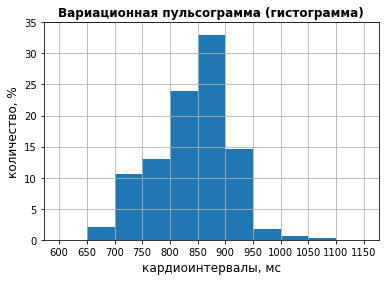

In [351]:
n, bins, patches = plt.hist(data_list, [i for i in range(600, 1200, 50)], histtype='bar', rwidth=50)
x_ticks = plt.xticks(np.arange(600, 1200, step=50))
y_ticks = plt.yticks(np.arange(0, 120, step=15), [str(i) for i in range(0, 40, 5)])
x_label = plt.xlabel('кардиоинтервалы, мс', fontsize=12)
y_label = plt.ylabel('количество, %', fontsize=12)
title = plt.title('Вариационная пульсограмма (гистограмма)', fontweight="bold")
plt.grid()

3. По полученному графику определить амплитуду моды АMо, которая соответствует максимальному значению, и моду Mо – значение аргумента в точке максимума.

In [352]:
v, ind = max( (v, i) for i, v in enumerate(n) )
M0 = (bins[ind] + bins[ind + 1])/2
M0

875.0

In [353]:
AM0 = v/len(data_list) * 100
print (AM0,'%')

33.0 %


4. Определить вариационный размах MxDMn

In [354]:
MxDMn = len(n.nonzero()[0])*50
MxDMn

450

5. Рассчитать индекс напряжения регуляторных систем ИН(SI).

In [355]:
SI = AM0 /(2 * (M0/1000) * (MxDMn/1000))
SI

41.904761904761905

6. По заданному массиву кардиоинтервалов построить график автокоррелограммы.

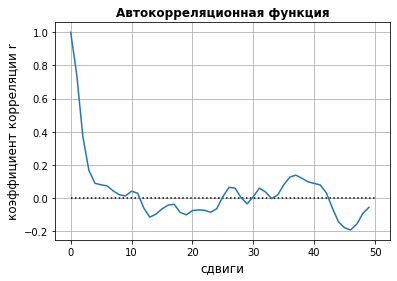

In [356]:
norm_data_list = [(item - M)/SDNN for item in data_list]
autocorrelation = np.correlate(norm_data_list, norm_data_list, mode='full') / len(data_list)
autocorrelation = autocorrelation[len(autocorrelation)//2:]

plt.plot(autocorrelation[0:50])
plt.grid()
plt.hlines(0, 0, 50, linestyle = ':')
x_label = plt.xlabel('сдвиги', fontsize=12)
y_label = plt.ylabel('коэффициент корреляции r', fontsize=12)
title = plt.title('Автокорреляционная функция', fontweight="bold")

7. Рассчитать значение коэффициента корреляции после первого сдвига СС1 и число сдвигов до первого нулевого значения коэффициента корреляции СС0.

In [357]:
CC1 = autocorrelation[1]
CC1

0.743101089217845

In [358]:
CC0 = 0
i = 0
while(autocorrelation[i] > 0):
    CC0 +=1
    i +=1
    
CC0

12

8. По заданному массиву кардиоинтервалов построить корреляционную ритмограмму.

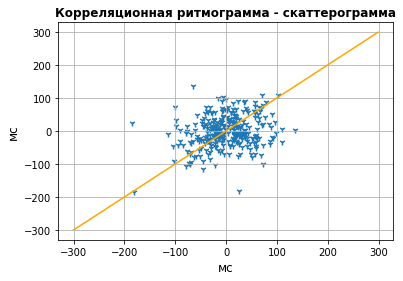

In [359]:
x = [data_list[i - 1] - data_list[i] for i in range(1, len(data_list) - 1)]
y = [data_list[i] - data_list[i + 1] for i in range(1, len(data_list) - 1)]
b = [i for i in range(-300, 300)]
plt.plot(b, b, color='orange')
plt.scatter(x=x, y=y, marker='1')
plt.grid()
x_label = plt.xlabel('мс', fontsize=12)
y_label = plt.ylabel('мс', fontsize=12)
title = plt.title('Корреляционная ритмограмма - скаттерограмма', fontweight="bold")